<a href="https://colab.research.google.com/github/LalaGon/AV2-GC-2021/blob/main/C%C3%B3pia_de_ProvaAV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DISCIPLINA: Gestão do Conhecimento	 PROFESSOR(A): Alex Salgado
PERÍODO: 7o. TURNO: noite AVALIAÇÃO:

ALUNO(A): Laís Gonçalves Senna.

GRAU: VISTO DO PROFESSOR:


# Questão 1 - valor (0,0)


*** Crie um repositório no Github e adicione este arquivo no mesmo


1.1 - Você deve escolher uma base de dados do Kaggle.

A natureza desse dataset deve se encaixar em um problema que podemos resolver utilizando modelos de previsão de machine learning supervisionado de classificação. 

A partir desta base de dados do Kaggle, você vai treinar o modelo, fazer previsões e calcular a acurácia do mesmo, usando modelos e algoritmos que desejar.

Obs1: Usar o Kaggle como fonte para o seu dataset obrigatoriamente.
Obs2: Implementações idênticas ou bem parecidas pode levar a anulação da NOTA ou seja, ZERO!! Faça o melhor com sua equipe apenas.


1.1 - Coloque aqui o link para o seu dataset escolhido no Kaggle.



In [ ]:
https://www.kaggle.com/rajyellow46/wine-quality

1.1.1 - Descreva sobre o que é base de dados.

In [ ]:
Os dois conjuntos de dados estão relacionados com as variantes tinto e branco do vinho português "Vinho Verde". A referência [Cortez et al., 2009]. Devido a questões de privacidade e logística, apenas estão disponíveis variáveis físico-químicas (entradas) e sensoriais (saídas) (por exemplo, não há dados sobre tipos de uva, marca de vinho, preço de venda do vinho, etc.).

1.1.2 - Se você fez em grupo, quais os nomes dos componentes do seu grupo?

In [ ]:
Iago Albuquerque, Jônatas Sales e Laís Senna.

1.2 - Após tratada, criar uma pasta no seu GoogleDrive e disponibilizar o link do arquivo de sua base (csv, xlsx, etc) para ser importado no seu código.

In [ ]:
https://drive.google.com/file/d/1ih-bjOcWLGsNaanILtFha5xdDjSSQAI5/view?usp=sharing

## Criar um código usando o Jupyter Notebook e responder (através de código) às seguintes questões:


# Questão 2 - valor (0,5)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2.1 - Importar os modulos python para machine learn e carregar o arquivo 

** Sugestão se for do tipo xlsx, usar o read_excel do pandas
import pandas as pd
dt = pd.read_excel("meuarquivo.xlsx")


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

wine = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/winequalityN.csv", sep=',')

In [3]:
#Alterar coluna 'type' para tipo int64
wine['type'] = wine['type'].replace('white',0.0)
wine['type'] = wine['type'].replace('red',1.0)

wine = wine.fillna(0)


2.2 - Exibir os primeiros registros desta tabela.


In [4]:
wine.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,0.0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0.0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,0.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,0.0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,0.0,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,0.0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,0.0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,0.0,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


2.3 - De que se trata esse banco de dados? e que tipo de previsão pode ser feito com ele?


In [5]:
Esse banco de dados se trata de dois conjuntos de dados que estão relacionados com as variantes tinto e branco do vinho português "Vinho Verde". Pode ser feita a previsão da qualidade do vinho de acordo com as informções da tabela.

SyntaxError: ignored

# Questão 3 - valor (1,5)


Utilizando as terminologias de Machine Learning(features e observações):



3.1 - Quantas "features" têm nessa base de dados?

In [ ]:
12

3.2 - Quantas observações têm nessa base de dados?


In [ ]:
6496

3.3 - Separe o que é entrada (features) do seu dataset na variável X, e exiba.

In [6]:
X = wine.drop('type',axis=1)

X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.00,11.2,6
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


3.4 - Separe o que é saída (target/resposta) do seu dataset na variável y, e exiba.

In [7]:
y = wine['type']
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
6492    1.0
6493    1.0
6494    1.0
6495    1.0
6496    1.0
Name: type, Length: 6497, dtype: float64

# Questão 4 - valor (1,5)


4.1 - Utilizando a sua base, faça um treinamento e uma previsão, usando o algoritmo de clsssificação de sua escolha.


In [8]:
#biblioteca de machine para python
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

# Treinar o modelo
model.fit(X, y)

# Predições
predict = model.predict([[15.0,1.27,0.36,20.7,0.045,41.0,170.0,1.0010,3.00,0.45,8.8,6]])
predict

array([0.])

# Questão 5 - valor (1,5)





Usando o método de avaliação de acurácia (Train test split), Escolha outros 2 algoritmos de classificação e calcule a acurácia dos mesmos.

In [9]:
# Medir acurácia
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

5.2 - Acurácia usando o algoritmo 1 ?


In [10]:
#biblioteca de machine para python
from sklearn.ensemble import ExtraTreesClassifier

model1 = ExtraTreesClassifier(n_estimators=100)
model1.fit(X_train, y_train)

prove = model1.predict(X_test) 

# corrigir a prova- definir a acurácia do modelo
score = accuracy_score (y_test, prove)
score

0.9953846153846154

5.3 - Acurácia usando o algoritmo 2 ?





In [11]:
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier(n_neighbors=1)
model2.fit(X_train, y_train)

prove = model2.predict(X_test) 

# corrigir a prova- definir a acurácia do modelo
score = accuracy_score (y_test, prove)
score

0.9392307692307692

5.4 - De acordo com seus resultados anteriores, qual dos 2 algoritmos é mais eficiente?


In [ ]:
Algoritmo 1 (ExtraTreesClassifier)

# Questão 6 - valor (1,5)



6 - Faça um visualização auto-explicativa da sua base de dados utilizando o matplotlib. Coloque o código e a visualização abaixo.


In [12]:
# Importando as Bibliotecas 
import matplotlib.pyplot as plt           # matplotlib
import numpy as np                        # operações numéricas
import pandas as pd                       # leitura de tabelas e outras fontes de dados e manipulação de dataframes (tabelas) 
import seaborn as sns                     # seaborn
import warnings 
warnings.filterwarnings("ignore")  # essa biblioteca impede que os avisos apareçam quando o código é rodado

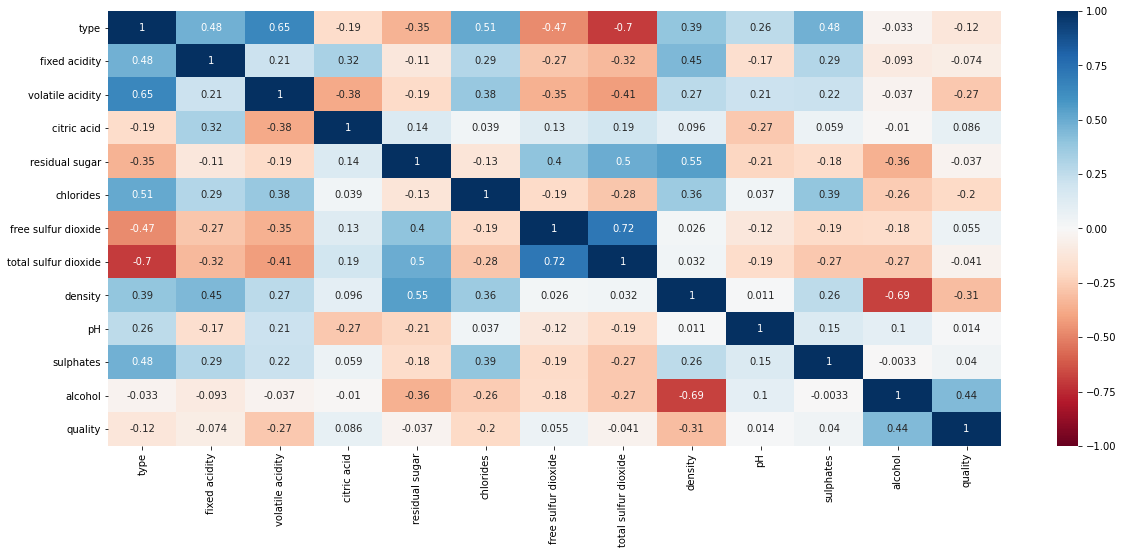

In [13]:
# O heatmap é uma otima forma de representar por cores dados tabulares, como a matriz de correlação entre as varáveis

wine_quality = wine.corr()     # Calcula o coeficiente de correlação enrre as variáveis, o default é o coeficente linear
plt.figure(figsize=(20,8))       # tamanho da figura
sns.heatmap(wine_quality,cmap = "RdBu", vmin= -1, annot = True)

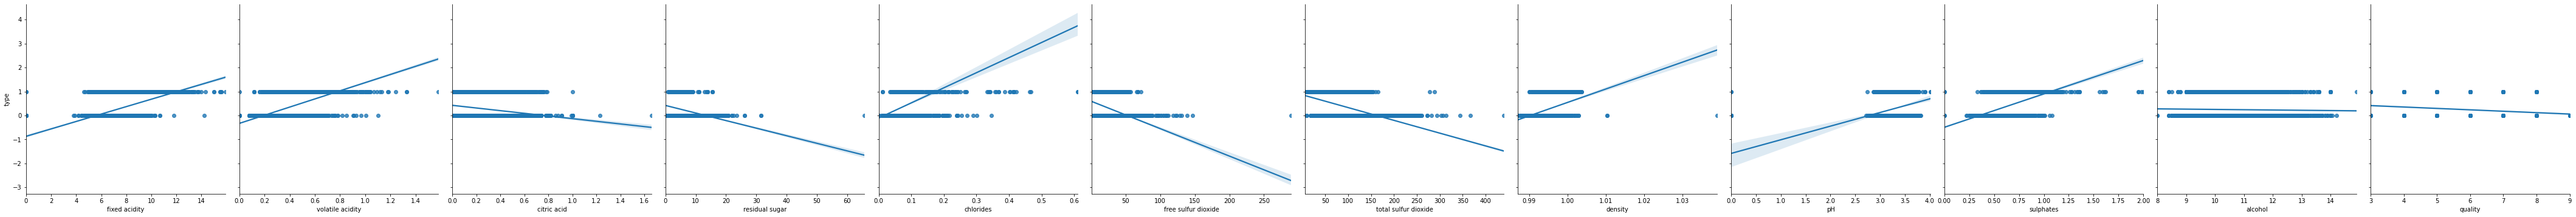

In [14]:
# Plotando somente as variáveis que nos interessam
sns.pairplot(wine,hue = None,y_vars = "type", x_vars = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"],  kind= "reg", height= 5)

In [ ]:
*** Envie o link do seu Github com essa resposta no Classroom